# Отток клиентов из банка

<h2> (Тема №7: Обучение с учителем) <a class="tocSkip"> </h2>

<a name="1"></a>
## 1. Содержание

[1. Содержание](#1)

[2. Описание проекта](#2)

*    [2.1. Цель проекта](#21)
*    [2.2. Задачи проекта](#22)
*    [2.3. Описание данных](#23)
*    [2.4. План работы](#24)

[3. Подготовка данных](#3)

*    [3.1. Изучение данных](#31)
*    [3.2. Пропуски](#32)
*    [3.3. Удаление признаков](#33)
*    [3.4. Разделение данных на выборки](#34)
*    [3.5. Кодирование категориальных признаков](#35)
*    [3.6. Масштабирование численных признаков](#36)
*    [3.7. Вывод](#37)

[4. Исследование задачи](#4)

*    [4.1. `DecisionTreeClassifier` при дисбалансе в таргете](#41)
*    [4.2. `RandomForestClassifier` при дисбалансе в таргете](#42)
*    [4.3. `RandomForestClassifier` + `GridSearchCV` при дисбалансе в таргете](#43)
*    [4.4. `LogisticRegression` при дисбалансе в таргете](#44)
*    [4.5. Сравнение моделей](#45)
*    [4.6. Матрица ошибок при дисбалансе в таргете](#46)
*    [4.7. Вывод](#47)

[5. Борьба с дисбалансом](#5)

*    [5.1. *Upsampling*](#51)
*    [5.2. *Downsampling*](#52)
*    [5.3. `DecisionTreeClassifier` при сбалансированном таргете](#53)
*    [5.4. `RandomForestClassifier` при сбалансированном таргете](#54)
*    [5.5. `LogisticRegression` при сбалансированном таргете](#55)
*    [5.6. Сравнение моделей](#56)
*    [5.7. Матрица ошибок при сбалансированном таргете](#57)
*    [5.8. Вывод](#58)

[6. Тестирование лучшей модели](#6)

*    [6.1. Качество модели](#61)
*    [6.2. Итоговое сравнение моделей](#62)
*    [6.3. `DummyClassifier`](#63)
*    [6.4. Матрица ошибок](#64)
*    [6.5. *ROC*-кривая](#65)
*    [6.6. Вывод](#66)

[7. Общий вывод](#7)

<a name="2"></a> <div style="text-align: right">[Cодержание](#1.-Содержание)</div>
## 2. Описание проекта

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Спрогнозируем, уйдёт клиент из банка в ближайшее время или нет. Нам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Построим модель с предельно большим значением *F1*-меры. Чтобы проект стал успешным, доведём метрику до 0.59. Проверим *F1*-меру на тестовой выборке.

Дополнительно измерим *AUC-ROC*, сравним её значение с *F1*-мерой.

<a name="21"></a> <div style="text-align: right">[Cодержание](#1.-Содержание)</div>
### 2.1. Цель проекта

Провести исследование с целью построения модели машинного обучения, которая поможет прогнозировать уход клиентов из «Бета-Банка» в ближайшее время.

Результаты исследования позволят маркетологам сохранить текущих клиентов, т.к. это дешевле, чем привлекать новых.

<a name="22"></a> <div style="text-align: right">[Cодержание](#1.-Содержание)</div>
### 2.2. Задачи проекта

1. Изучить данные.
2. Подготовить данные.
3. Исследовать баланс классов, обучить модель без учёта дисбаланса.
4. Улучшить качество модели, учитывая дисбаланс классов. Обучить разные модели и найти лучшую.
5. Протестировать лучшую модель.
6. Проверить гипотезы.
7. Написать общий вывод.

Значение метрики *F1*-мера должно быть доведено до 0.59. 

В ходе проведения исследования необходимо проверить несколько гипотез:

- Гипотеза 1: лучшая модель на валидационной выборке - модель случайного леса;
- Гипотеза 2: значение метрики *F1*-мера лучшей модели больше 0.59;
- Гипотеза 3: значение метрики *AUC-ROC* повышается с ростом значения *F1*-меры;
- Гипотеза 4: лучшая модель чаще ошибается, прогнозируя клиентов, которые ушли из банка.

<a name="23"></a> <div style="text-align: right">[Cодержание](#1.-Содержание)</div>
### 2.3. Описание данных

Нам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком.

Данные находятся в файле `churn.csv` (англ. «отток клиентов»).

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling).

**Признаки:**

- `RowNumber` — индекс строки в данных
- `CustomerId` — уникальный идентификатор клиента
- `Surname` — фамилия
- `CreditScore` — кредитный рейтинг
- `Geography` — страна проживания
- `Gender` — пол
- `Age` — возраст
- `Tenure` — сколько лет человек является клиентом банка
- `Balance` — баланс на счёте
- `NumOfProducts` — количество продуктов банка, используемых клиентом
- `HasCrCard` — наличие кредитной карты
- `IsActiveMember` — активность клиента
- `EstimatedSalary` — предполагаемая зарплата

**Целевой признак:**

- `Exited` — факт ухода клиента

<a name="24"></a> <div style="text-align: right">[Cодержание](#1.-Содержание)</div>
### 2.4. План работы

1. Подготовка данных:

    - Изучение данных
    - Пропуски
    - Удаление признаков
    - Разделение данных на выборки
    - Кодирование категориальных признаков
    - Масштабирование численных признаков


2. Исследование задачи:

    - `DecisionTreeClassifier` при дисбалансе в таргете
    - `RandomForestClassifier` при дисбалансе в таргете
    - `RandomForestClassifier` + `GridSearchCV` при дисбалансе в таргете
    - `LogisticRegression` при дисбалансе в таргете
    - Сравнение моделей
    - Матрица ошибок при дисбалансе в таргете


3. Борьба с дисбалансом:

    - *Upsampling*
    - *Downsampling*
    - `DecisionTreeClassifier` при сбалансированном таргете
    - `RandomForestClassifier` при сбалансированном таргете
    - `LogisticRegression` при сбалансированном таргете
    - Сравнение моделей
    - Матрица ошибок при сбалансированном таргете


4. Тестирование лучшей модели:

    - Качество модели
    - Итоговое сравнение моделей
    - `DummyClassifier`
    - Матрица ошибок
    - *ROC*-кривая


5. Общий вывод.

<a name="3"></a> <div style="text-align: right">[Cодержание](#1.-Содержание)</div>
## 3. Подготовка данных

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import time

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from random import randint
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import shuffle

from tqdm import tqdm

RANDOM_STATE = 12345

<a name="31"></a> <div style="text-align: right">[Cодержание](#1.-Содержание)</div>
### 3.1. Изучение данных

In [2]:
try:
    data = pd.read_csv('/datasets/churn.csv')
except:
    try:
        data = pd.read_csv(r'C:/Users/lorad/OneDrive/Documents/Моя папка/Data Science/Курсы/'
                            'Яндекс.Практикум. Специалист по Data Science/Проектная работа/'
                            '07. Обучение с учителем/churn.csv')
    except:
        try:
            data = pd.read_csv(r'D:/Юлия/Data Science/Курсы/'
                                'Яндекс.Практикум. Специалист по Data Science/Проектная работа/'
                                '07. Обучение с учителем/churn.csv')
        except:
            data = pd.read_csv('https://docs.google.com/spreadsheets/d/e/'
                               '2PACX-1vS6NNjY7Shj8UmeL4paHvSmJ2HgEaw9R9Pzq285KG2NShnmeLlQ21gRhh9nFeFml_UCcVpYYbbvi_DV/'
                               'pub?output=csv')

Выведем размеры датасета.

In [3]:
data.shape

(10000, 14)

Выведем первые 10 строк датасета.

In [4]:
data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


Выведем общую информацию о датасете.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Пропуски присутствуют только в признаке `Tenure`.

Проверим явные дубликаты в датафрейме.

In [6]:
data.duplicated().sum()

0

Выведем числовое описание данных в признаке `Tenure`, применив метод `.describe()`.

In [7]:
data['Tenure'].describe()

count    9091.000000
mean        4.997690
std         2.894723
min         0.000000
25%         2.000000
50%         5.000000
75%         7.000000
max        10.000000
Name: Tenure, dtype: float64

Мы видим, что значения среднего и медианы в признаке `Tenure` практически не отличаются друг от друга:
```
mean = 4.997690
50% = 5.000000
```

Проверим датасет на дисбаланс в таргете `Exited`.

In [8]:
data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

В таргете присутствует дисбаланс классов.

<a name="32"></a> <div style="text-align: right">[Cодержание](#1.-Содержание)</div>
### 3.2. Пропуски

Выведем количество пропусков в признаке `Tenure`.

In [9]:
data['Tenure'].isna().sum()

909

Выведем количество каждого из значений признака `Tenure` и его размер до обработки пропусков.

In [10]:
print(data['Tenure'].value_counts().sort_values(ascending=False))
print("Размер признака 'Tenure':", data['Tenure'].value_counts().sum())

1.0     952
2.0     950
8.0     933
3.0     928
5.0     927
7.0     925
4.0     885
9.0     882
6.0     881
10.0    446
0.0     382
Name: Tenure, dtype: int64
Размер признака 'Tenure': 9091


Распределение количества значений в признаке `Tenure`, примерно, равномерное.

Попробуем несколько способов обработки пропусков в признаке `Tenure`:
1. Заменим пропуски на среднее значение.
2. Заменим пропуски на медиану.
3. Удалим пропуски.
4. Заполним пропуски случайными числами.
5. Сделаем `Tenure` категориальным признаком.
6. Заменим пропуски на "0".

**1. Замена на среднее значение.**

Заполненим пропуски в признаке `Tenure` средним значением и выведем количество каждого из его значений и его размер. 

Запишем результат в отдельную переменную `tenure_mean`.

In [11]:
tenure_mean = data['Tenure'].fillna(data['Tenure'].mean())

print(tenure_mean.value_counts().sort_values(ascending=False))
print("Размер признака 'Tenure':", tenure_mean.value_counts().sum())

1.00000     952
2.00000     950
8.00000     933
3.00000     928
5.00000     927
7.00000     925
4.99769     909
4.00000     885
9.00000     882
6.00000     881
10.00000    446
0.00000     382
Name: Tenure, dtype: int64
Размер признака 'Tenure': 10000


Количество значений "5" в признаке `Tenure` увеличилось почти в 2 раза засчёт значения "4.99769". Поэтому заменять пропуски на среднее значение некорректно.

**2. Замена на медиану.**

Заполненим пропуски в признаке `Tenure` медианой и выведем количество каждого из его значений и его размер. 

Запишем результат в отдельную переменную `tenure_median`.

In [12]:
tenure_median = data['Tenure'].fillna(data['Tenure'].median())

print(tenure_median.value_counts().sort_values(ascending=False))
print("Размер признака 'Tenure':", tenure_median.value_counts().sum())

5.0     1836
1.0      952
2.0      950
8.0      933
3.0      928
7.0      925
4.0      885
9.0      882
6.0      881
10.0     446
0.0      382
Name: Tenure, dtype: int64
Размер признака 'Tenure': 10000


Количество значений "5" в признаке `Tenure` увеличилось почти в 2 раза. Поэтому заменять пропуски на медиану некорректно.

**3. Удаление пропусков.**

Удаление пропусков в признаке `Tenure` не совсем корректно, т.к. пропуски составляют почти 10% от всего датасета.

**4. Замена на случайные числа.**

Заполненим пропуски в признаке `Tenure` случайными числами и выведем количество каждого из его значений и его размер. Функция `randint()` генерирует целые случайные числа от 0 до 10.  

Запишем результат в отдельную переменную `tenure_rand`.

In [13]:
tenure_rand = data['Tenure'].fillna(
    pd.Series(np.random.randint(0, 11, size=len(data)), index=data.index))

print(tenure_rand.value_counts().sort_values(ascending=False))
print("Размер признака 'Tenure':", tenure_rand.value_counts().sum())

2.0     1043
1.0     1036
5.0     1030
7.0     1022
8.0     1015
3.0     1013
6.0      972
4.0      958
9.0      958
10.0     516
0.0      437
Name: Tenure, dtype: int64
Размер признака 'Tenure': 10000


Если заполнить пропуски случайными числами, то значения гиперпараметров, а значит, и метрик моделей будут меняться при каждом запуске кода проекта вслед за изменением распределения классов внутри признака `Tenure`. Как следствие, не при каждом запуске кода может выполняться условие задачи: значение *F1*-меры > 0.59.

Тем не менее, распределение количества значений в признаке `Tenure` сохраняет равномерность. Поэтому мы можем заполнить пропуски случайными числами.

**5. Преобразование в категориальный признак.**

Так как значений в признаке `Tenure` ограниченное количество, можно было бы сделать его категориальным признаком. Пропуски можно указать как отдельную категорию (заполнить значением "-1"). Затем заменить тип данных признака `Tenure` на `object` и применить технику прямого кодирования *OHE*. Тем не менее, категоризировать числовой показатель некорректно.

**6. Замена на "0".**

Заполненим пропуски в признаке `Tenure` на значение "0", подразумевая, что это новые клиенты, и выведем количество каждого из его значений и его размер. 

Запишем результат в отдельную переменную `tenure_zero`.

In [14]:
tenure_zero = data['Tenure'].fillna(0)

print(tenure_zero.value_counts().sort_values(ascending=False))
print("Размер признака 'Tenure':", tenure_zero.value_counts().sum())

0.0     1291
1.0      952
2.0      950
8.0      933
3.0      928
5.0      927
7.0      925
4.0      885
9.0      882
6.0      881
10.0     446
Name: Tenure, dtype: int64
Размер признака 'Tenure': 10000


Количество значений "0" в признаке `Tenure` резко возрасло. Поэтому заменять пропуски на "0" некорректно.

**Итог.**

Итак: заменим пропуски в признаке `Tenure` на случайные числа.

In [15]:
data['Tenure'] = data['Tenure'].fillna(
    pd.Series(np.random.randint(0, 11, size=len(data)), index=data.index))
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


<a name="33"></a> <div style="text-align: right">[Cодержание](#1.-Содержание)</div>
### 3.3. Удаление признаков

In [16]:
data.shape

(10000, 14)

Удалим из датасета признаки, данные которых не влияют на целевой признак `Exited` (факт ухода клиента):
- `RowNumber` — индекс строки в данных,
- `Surname` — фамилия.

Выведем оптимизированный датасет.

In [17]:
data = data.drop(['RowNumber', 'Surname'], axis=1)
data.head(10)

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,15574012,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,15592531,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,15656148,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,15792365,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,15592389,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


In [18]:
data.shape

(10000, 12)

После обучения модели можно предсказать, кто из клиентов планирует уйти. В качестве идентификатора клиента можно использовать признак `CustomerId`, т.к. все его значения - уникальны. Сделаем признак `CustomerId` индексом.

In [19]:
data.set_index('CustomerId', inplace=True)
data.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [20]:
data.shape

(10000, 11)

<a name="34"></a> <div style="text-align: right">[Cодержание](#1.-Содержание)</div>
### 3.4. Разделение данных на выборки

Выделим из датасета по отдельности целевой признак `target` (признак `Exited`) и оставшиеся признаки `features`.

In [21]:
target = data['Exited']
features = data.drop('Exited', axis=1)

Разделим исходные данные на обучающую, валидационную и тестовую выборки в пропорции 3:1:1. Для корректного разбиения датасета применим аргумент `stratify`.

Сначала разделим полученые данные на промежуточную (`train_valid`) и тестовую выборки (20%).

In [22]:
features_train_valid, features_test, \
target_train_valid, target_test = train_test_split(
    features, target, test_size=0.20, random_state=RANDOM_STATE, stratify=target)

Затем разделим промежуточную выборку (`train_valid`) на обучающую и валидационную (25% от промежуточной выборки = 20% от исходного датасета).

In [23]:
features_train, features_valid, target_train, target_valid = train_test_split(
    features_train_valid, target_train_valid, test_size=0.25, 
    random_state=RANDOM_STATE, stratify=target_train_valid)

In [24]:
print('Размеры выборок:')
print(f'train: {len(features_train)} - {len(features_train)/len(data):.0%}')
print(f'train_valid: {len(features_train_valid)} \
- {len(features_train_valid)/len(data):.0%}')
print(f'valid: {len(features_valid)} - {len(features_valid)/len(data):.0%}')
print(f'test: {len(features_test)} - {len(features_test)/len(data):.0%}')

Размеры выборок:
train: 6000 - 60%
train_valid: 8000 - 80%
valid: 2000 - 20%
test: 2000 - 20%


Сбросим индексы. Это понадобится для последующего кодирования.

In [25]:
features_train = features_train.reset_index(drop=True)
target_train = target_train.reset_index(drop=True)

features_train_valid = features_train_valid.reset_index(drop=True)
target_train_valid = target_train_valid.reset_index(drop=True)

features_valid = features_valid.reset_index(drop=True)
target_valid = target_valid.reset_index(drop=True)

features_test = features_test.reset_index(drop=True)
target_test = target_test.reset_index(drop=True)

<a name="35"></a> <div style="text-align: right">[Cодержание](#1.-Содержание)</div>
### 3.5. Кодирование категориальных признаков

Посмотрим, какие категориальные признаки нужно преобразовать в численные.

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 15634602 to 15628319
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  float64
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 937.5+ KB


Преобразуем категориальные признаки в численные с помощью техники прямого кодирования (*One-Hot Encoding, OHE*). Для этого применим к данным функцию `OneHotEncoder()`.

В переменной `categorical` сохраним список категориальных признаков.

In [27]:
categorical = ['Geography', 'Gender']

In [28]:
# создадим копии выборок для последующего кодирования категориальных признаков
features_train_ohe = features_train.copy()
features_train_valid_ohe = features_train_valid.copy()
features_valid_ohe = features_valid.copy()
features_test_ohe = features_test.copy()


# создадим объект класса OneHotEncoder(),
# параметр sparse=False вернет массив (sparse=True - сжатую матрицу)
encoder = OneHotEncoder(sparse=False, handle_unknown='error', drop='first')


# Применим функцию fit_transform() для обучающей выборки:

# создадим датафрейм с закодированными категориальными признаками categorical
encoded_train = pd.DataFrame(encoder.fit_transform(
    features_train_ohe[categorical]))
# используем вывод метода .get_feature_names_out(), чтобы добавить названия признаков
encoded_train.columns = encoder.get_feature_names_out()

# присоединим датафрейм encoded_train к исходному датафрейму, удалив categorical
features_train_ohe = features_train_ohe.join(encoded_train)
features_train_ohe.drop(categorical, axis = 1, inplace = True)


# Применим функцию transform() для промежуточной выборки:

# создадим датафрейм с закодированными категориальными признаками categorical
encoded_train_valid = pd.DataFrame(encoder.transform(
    features_train_valid_ohe[categorical]))
# используем вывод метода .get_feature_names_out(), чтобы добавить названия признаков
encoded_train_valid.columns = encoder.get_feature_names_out()

# присоединим датафрейм encoded_train_valid к исходному датафрейму, удалив categorical
features_train_valid_ohe = features_train_valid_ohe.join(
    encoded_train_valid)
features_train_valid_ohe.drop(categorical, axis = 1, inplace = True)


# Применим функцию transform() для валидационной выборки:

# создадим датафрейм с закодированными категориальными признаками categorical
encoded_valid = pd.DataFrame(encoder.transform(
    features_valid_ohe[categorical]))
# используем вывод метода .get_feature_names_out(), чтобы добавить названия признаков
encoded_valid.columns = encoder.get_feature_names_out()

# присоединим датафрейм encoded_valid к исходному датафрейму, удалив categorical
features_valid_ohe = features_valid_ohe.join(encoded_valid)
features_valid_ohe.drop(categorical, axis = 1, inplace = True)


# Применим функцию transform() для тестовой выборки:

# создадим датафрейм с закодированными категориальными признаками categorical
encoded_test = pd.DataFrame(encoder.transform(
    features_test_ohe[categorical]))
# используем вывод метода .get_feature_names_out(), чтобы добавить названия признаков
encoded_test.columns = encoder.get_feature_names_out()

# присоединим датафрейм encoded_test к исходному датафрейму, удалив categorical
features_test_ohe = features_test_ohe.join(encoded_test)
features_test_ohe.drop(categorical, axis = 1, inplace = True)


display("Выборка 'train'", features_train_ohe.head())
print(features_train_ohe.shape)

display("Выборка 'train_valid'", features_train_valid_ohe.head())
print(features_train_valid_ohe.shape)

display("Выборка 'valid'", features_valid_ohe.head())
print(features_valid_ohe.shape)

display("Выборка 'test'", features_test_ohe.head())
print(features_test_ohe.shape)

"Выборка 'train'"

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,636,45,1.0,0.00,2,1,1,159463.80,0.0,1.0,1.0
1,808,33,2.0,103516.87,1,1,0,113907.80,0.0,0.0,0.0
2,758,34,1.0,154139.45,1,1,1,60728.89,0.0,0.0,0.0
3,809,39,5.0,0.00,1,1,0,77705.75,0.0,0.0,0.0
4,603,24,1.0,165149.13,2,1,0,21858.28,0.0,1.0,1.0


(6000, 11)


"Выборка 'train_valid'"

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,644,40,4.0,77270.08,2,1,1,115800.10,1.0,0.0,0.0
1,607,27,5.0,100912.19,1,0,0,7631.27,0.0,1.0,0.0
2,599,46,7.0,81742.84,2,1,0,83282.21,0.0,1.0,0.0
3,632,38,6.0,86569.76,2,1,0,98090.91,1.0,0.0,0.0
4,429,60,7.0,0.00,2,1,1,163691.48,0.0,0.0,1.0


(8000, 11)


"Выборка 'valid'"

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,659,48,4.0,123593.22,2,1,0,82469.06,1.0,0.0,1.0
1,550,42,10.0,128707.31,1,1,0,63092.65,1.0,0.0,0.0
2,850,41,3.0,0.00,2,1,0,128892.36,0.0,0.0,1.0
3,755,36,8.0,0.00,2,1,0,176809.87,0.0,0.0,1.0
4,703,58,4.0,92930.92,1,0,1,85148.78,0.0,1.0,1.0


(2000, 11)


"Выборка 'test'"

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,850,48,2.0,0.00,1,1,0,169425.30,0.0,1.0,1.0
1,651,28,10.0,79562.98,1,1,1,74687.37,0.0,0.0,1.0
2,714,34,10.0,0.00,2,1,1,80234.14,0.0,0.0,1.0
3,782,41,4.0,0.00,1,1,0,132943.88,0.0,1.0,0.0
4,521,41,2.0,0.00,2,1,1,113089.43,0.0,0.0,0.0


(2000, 11)


<a name="36"></a> <div style="text-align: right">[Cодержание](#1.-Содержание)</div>
### 3.6. Масштабирование численных признаков

Масштабируем численные признаки. Для этого стандартизируем данные с помощью класса `StandardScaler()`. 

В переменной `numeric` сохраним список всех численных признаков. После кодирования - все признаки стали численными, поэтому можем указать названия всех признаков каждой из выборок.

In [29]:
numeric = features_train_ohe.columns
numeric

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

In [30]:
# создадим копии выборок для последующего масштабирования численных признаков
features_train_ohe_scaler = features_train_ohe.copy()
features_train_valid_ohe_scaler = features_train_valid_ohe.copy()
features_valid_ohe_scaler = features_valid_ohe.copy()
features_test_ohe_scaler = features_test_ohe.copy()


# добавим эту строку, чтобы не появлялось предупреждение 'SettingWithCopy'
pd.options.mode.chained_assignment = None 


# создадим объект класса StandardScaler()
scaler = StandardScaler()

# с помощью метода .fit() настроим объект на обучающих данных 
# (настройка — это вычисление среднего и дисперсии)
scaler.fit(features_train_ohe_scaler[numeric]) 

# преобразуем обучающую выборку функцией transform(), 
# (т.е. нормируем значения признаков - 
# все значения становятся в диапазоне от 0 до 1)
features_train_ohe_scaler[numeric] = scaler.transform(
    features_train_ohe_scaler[numeric])  

# преобразуем промежуточную выборку функцией transform()
features_train_valid_ohe_scaler[numeric] = scaler.transform(
    features_train_valid_ohe_scaler[numeric])
                                                                    
# преобразуем валидационную выборку функцией transform()
features_valid_ohe_scaler[numeric] = scaler.transform(
    features_valid_ohe_scaler[numeric])

# преобразуем тестовую выборку функцией transform()
features_test_ohe_scaler[numeric] = scaler.transform(
    features_test_ohe_scaler[numeric])  


display("Выборка 'train'", features_train_ohe_scaler.head())
print(features_train_ohe_scaler.shape)

display("Выборка 'train_valid'", features_train_valid_ohe_scaler.head())
print(features_train_valid_ohe_scaler.shape)

display("Выборка 'valid'", features_valid_ohe_scaler.head())
print(features_valid_ohe_scaler.shape)

display("Выборка 'test'", features_test_ohe_scaler.head())
print(features_test_ohe_scaler.shape)

"Выборка 'train'"

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,-0.143332,0.577533,-1.375094,-1.220573,0.797767,0.652576,0.967527,1.029613,-0.572988,1.734363,0.915552
1,1.632702,-0.564119,-1.032818,0.435807,-0.916018,0.652576,-1.033563,0.237986,-0.572988,-0.576580,-1.092237
2,1.116413,-0.468981,-1.375094,1.245822,-0.916018,0.652576,0.967527,-0.686104,-0.572988,-0.576580,-1.092237
3,1.643028,0.006707,-0.005990,-1.220573,-0.916018,0.652576,-1.033563,-0.391097,-0.572988,-0.576580,-1.092237
4,-0.484083,-1.420358,-1.375094,1.421989,0.797767,0.652576,-1.033563,-1.361559,-0.572988,1.734363,0.915552


(6000, 11)


"Выборка 'train_valid'"

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,-0.060726,0.101845,-0.348266,0.015831,0.797767,0.652576,0.967527,0.270868,1.745237,-0.576580,-1.092237
1,-0.442780,-1.134945,-0.005990,0.394130,-0.916018,-1.532388,-1.033563,-1.608781,-0.572988,1.734363,-1.092237
2,-0.525386,0.672671,0.678562,0.087400,0.797767,0.652576,-1.033563,-0.294195,-0.572988,1.734363,-1.092237
3,-0.184635,-0.088430,0.336286,0.164636,0.797767,0.652576,-1.033563,-0.036864,1.745237,-0.576580,-1.092237
4,-2.280768,2.004598,0.678562,-1.220573,0.797767,0.652576,0.967527,1.103077,-0.572988,-0.576580,0.915552


(8000, 11)


"Выборка 'valid'"

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,0.094161,0.862946,-0.348266,0.757050,0.797767,0.652576,-1.033563,-0.308325,1.745237,-0.576580,0.915552
1,-1.031349,0.292120,1.705390,0.838881,-0.916018,0.652576,-1.033563,-0.645029,1.745237,-0.576580,-1.092237
2,2.066384,0.196983,-0.690542,-1.220573,0.797767,0.652576,-1.033563,0.498373,-0.572988,-0.576580,0.915552
3,1.085435,-0.278706,1.020838,-1.220573,0.797767,0.652576,-1.033563,1.331035,-0.572988,-0.576580,0.915552
4,0.548495,1.814323,-0.348266,0.266421,-0.916018,-1.532388,0.967527,-0.261760,-0.572988,1.734363,0.915552


(2000, 11)


"Выборка 'test'"

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,2.066384,0.862946,-1.032818,-1.220573,-0.916018,0.652576,-1.033563,1.202714,-0.572988,1.734363,0.915552
1,0.011555,-1.039807,1.705390,0.052520,-0.916018,0.652576,0.967527,-0.443548,-0.572988,-0.576580,0.915552
2,0.662079,-0.468981,1.705390,-1.220573,0.797767,0.652576,0.967527,-0.347161,-0.572988,-0.576580,0.915552
3,1.364231,0.196983,-0.348266,-1.220573,-0.916018,0.652576,-1.033563,0.568776,-0.572988,1.734363,-1.092237
4,-1.330797,0.196983,-1.032818,-1.220573,0.797767,0.652576,0.967527,0.223765,-0.572988,-0.576580,-1.092237


(2000, 11)


Проверим типы данных признаков.

In [31]:
features_train_ohe_scaler.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        6000 non-null   float64
 1   Age                6000 non-null   float64
 2   Tenure             6000 non-null   float64
 3   Balance            6000 non-null   float64
 4   NumOfProducts      6000 non-null   float64
 5   HasCrCard          6000 non-null   float64
 6   IsActiveMember     6000 non-null   float64
 7   EstimatedSalary    6000 non-null   float64
 8   Geography_Germany  6000 non-null   float64
 9   Geography_Spain    6000 non-null   float64
 10  Gender_Male        6000 non-null   float64
dtypes: float64(11)
memory usage: 515.8 KB


<a name="37"></a> <div style="text-align: right">[Cодержание](#1.-Содержание)</div>
### 3.7. Вывод

В разделе [**Подготовка данных**](#3.-Подготовка-данных) были выполнены следующие задачи:
1. Получена общая информация о датасете.
2. Обработаны пропуски.
3. Удалены лишние признаки.
4. Данные разделены на выборки.
5. Выполнено кодирование категориальных признаков с помощью техники прямого кодирования *One-Hot Encoding* (*OHE*).
6. Выполнено масштабирование численных признаков.


В результате выполнения задач этого раздела было выявлено следующее:
- В датасете содержатся и численные, и категориальные признаки.
- Явные дубликаты в датафрейме отсутствуют.
- Пропуски присутствуют только в признаке `Tenure`.
- Лучшим способом обработки пропусков в признаке `Tenure` выбрано заполнение случайными числами.
- В таргете `Exited` присутствует дисбаланс классов.

**В проекте решается задача бинарной классификации.**

Таким образом, данные подготовлены для обучения моделей.

<a name="4"></a> <div style="text-align: right">[Cодержание](#1.-Содержание)</div>
## 4. Исследование задачи

Исследуем баланс классов, обучим модель без учёта дисбаланса.

Как уже отмечалось выше, датасет не сбалансирован в таргете `Exited`.

In [32]:
target.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

Состав классов в таргете показывает, что количество ушедших клиентов (положительных ответов) почти в 4 раза меньше, чем оставшихся в банке.

Исследуем качество разных моделей, меняя гиперпараметры. Т.к. в таргете только два класса объектов ("0" и "1"), то в нашем случае решается задача бинарной классификации.

<a name="41"></a> <div style="text-align: right">[Cодержание](#1.-Содержание)</div>
### 4.1. `DecisionTreeClassifier` при дисбалансе в таргете

Классифицируем валидационные данные с помощью модели **дерева решений *Decision Tree*** при дисбалансе классов в таргете.

Для построения графиков зависимости *F1*-меры от глубины дерева `max_depth` на обучающей и валидационной выборках дополнительно создадим следующие списки:
- `list_depth_dt` - список со значениями глубины дерева `max_depth`;
- `list_f1_dt_train` - список со значениями *F1*-меры на обучающей выборке;
- `list_f1_dt_valid` - список со значениями *F1*-меры на валидационной выборке.

Библиотека `tqdm` позволяет наглядно проиллюстрировать ход выполнения программы.

In [33]:
%%time


# лучшая модель (модель с самым высоким значением F1-меры)
best_model_dt = None
# глубина дерева лучшей модели
best_depth_dt = 0
# F1-мера лучшей модели
best_f1_dt = 0
# AUC-ROC лучшей модели
best_roc_auc_dt = 0

# список с глубиной дерева max_depth 
list_depth_dt = []
# список с F1-мерой на обучающей выборке
list_f1_dt_train = []
# список с F1-мерой на валидационной выборке
list_f1_dt_valid = []

# напишем цикл для гиперпараметра max_depth от 1 до 10
for depth in tqdm(range(1, 11, 1)):
    # построим модель дерева решений model_dt, 
    # указав максимально допустимую глубину дерева max_depth
    model_dt = DecisionTreeClassifier(random_state=RANDOM_STATE, 
                                      max_depth=depth)
    # обучим модель на обучающей выборке
    model_dt.fit(features_train_ohe_scaler, target_train)
        
    # получим предсказания модели на обучающей выборке
    predictions_dt_train = pd.Series(
        model_dt.predict(features_train_ohe_scaler))
    # рассчитаем F1-меру на обучающей выборке
    f1_dt_train = f1_score(
        target_train, predictions_dt_train)    
    
    # получим предсказания модели на валидационной выборке
    predictions_dt_valid = pd.Series(
        model_dt.predict(features_valid_ohe_scaler))
    # рассчитаем F1-меру на валидационной выборке
    f1_dt_valid = f1_score(
        target_valid, predictions_dt_valid)     
    
    # список с глубиной дерева max_depth
    list_depth_dt.append(depth) 
    # список с F1-мерой модели на обучающей выборке
    list_f1_dt_train.append(f1_dt_train)
    # список с F1-мерой модели на валидационной выборке
    list_f1_dt_valid.append(f1_dt_valid)    
    
    # найдём значения вероятностей классов на валидационной выборке
    probabilities_dt_valid = model_dt.predict_proba(
        features_valid_ohe_scaler)
    # в переменной probabilities_one_dt_valid сохраним значения 
    # вероятностей класса «1»
    probabilities_one_dt_valid = probabilities_dt_valid[:, 1]
    # посчитаем AUC-ROC
    roc_auc_dt_valid = roc_auc_score(
        target_valid, probabilities_one_dt_valid)
    
    # сохраним лучшие параметры
    if f1_dt_valid > best_f1_dt:
        # сохраним лучшую модель
        best_model_dt = model_dt
        # сохраним глубину дерева лучшей модели 
        # на валидационной выборке
        best_depth_dt = depth 
        # сохраним F1-меру лучшей модели на валидационной выборке
        best_f1_dt = f1_dt_valid
        # сохраним AUC-ROC лучшей модели на валидационной выборке
        best_roc_auc_dt = roc_auc_dt_valid
            

print('Best model DT valid:', best_model_dt)
print('Best max_depth DT valid:', best_depth_dt)
print(f'Best F1-score DT valid: {best_f1_dt:.2f}')
print(f'Best AUC-ROC DT valid: {best_roc_auc_dt:.2f}')

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 52.58it/s]

Best model DT valid: DecisionTreeClassifier(max_depth=8, random_state=12345)
Best max_depth DT valid: 8
Best F1-score DT valid: 0.58
Best AUC-ROC DT valid: 0.81
CPU times: total: 188 ms
Wall time: 194 ms


Лучшая модель дерева решений **`DecisionTreeClassifier`** на валидационной выборке при дисбалансе в таргете имеет значения метрик оценки качества:
- ***F1-мера = 0.58***
- ***AUC-ROC = 0.81*** 

при следующих параметрах:
- глубина дерева: `max_depth` = 8

Т.е. *F1*-мера не превышает заданный порог 0,59.

Выведем полученные списки `list_depth_dt`, `list_f1_dt_train` и `list_f1_dt_valid`.

In [34]:
# список с глубиной дерева max_depth
list_depth_dt

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [35]:
# список с F1-мерой модели на обучающей выборке
list_f1_dt_train

[0.0,
 0.510659395141299,
 0.42576687116564416,
 0.5267712276906437,
 0.5067290813341135,
 0.5819715340010543,
 0.6099436186570989,
 0.6624636275460717,
 0.694726656990808,
 0.7377904220009485]

In [36]:
# список с F1-мерой модели на валидационной выборке
list_f1_dt_valid

[0.0,
 0.514792899408284,
 0.375,
 0.5168539325842697,
 0.46045694200351495,
 0.5358851674641149,
 0.547433903576983,
 0.5829725829725829,
 0.5499276410998553,
 0.5338983050847457]

Построим график зависимости *F1*-меры модели дерева решений от глубины дерева `max_depth` на обучающей и валидационной выборках.

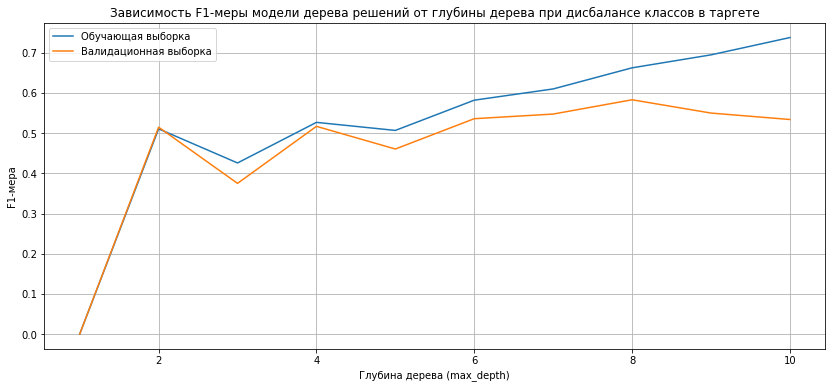

In [37]:
plt.figure(figsize=(14, 6))
plt.grid(True)
plt.plot(list_depth_dt, list_f1_dt_train)
plt.plot(list_depth_dt, list_f1_dt_valid)
plt.legend(['Обучающая выборка', 'Валидационная выборка'])
plt.xlabel('Глубина дерева (max_depth)')
plt.ylabel('F1-мера')
plt.title('Зависимость F1-меры модели дерева решений \
от глубины дерева при дисбалансе классов в таргете')
plt.show()

На графике видно, что переобучение наступает при глубине дерева `max_depth` > 6.

<a name="42"></a> <div style="text-align: right">[Cодержание](#1.-Содержание)</div>
### 4.2. `RandomForestClassifier` при дисбалансе в таргете

Классифицируем валидационные данные с помощью модели **случайного леса *Random Forest*** при дисбалансе классов в таргете.

Добавим дополнительный гиперпараметр `n_estimators` - количество деревьев.

In [38]:
%%time


# лучшая модель (модель с самым высоким значением F1-меры)
best_model_rf = None
# количество деревьев лучшей модели
best_est_rf = 0
# глубина дерева лучшей модели
best_depth_rf = 0
# F1-мера лучшей модели
best_f1_rf = 0
# AUC-ROC лучшей модели
best_roc_auc_rf = 0

# напишем два цикла для гиперпараметров n_estimators и max_depth
for est in tqdm(range(23, 27, 1)):
    for depth in range (7, 11, 1):
        # построим модель случайного леса с заданным количеством деревьев 
        # n_estimators и глубиной дерева max_depth,
        # добавив взвешивание классов (параметр class_weight='balanced')
        model_rf = RandomForestClassifier(class_weight='balanced', 
                                          max_depth=depth, 
                                          n_estimators=est, 
                                          random_state=RANDOM_STATE)
        # обучим модель на обучающей выборке
        model_rf.fit(features_train_ohe_scaler, target_train)
        
        # получим предсказания модели на валидационной выборке
        predictions_rf_valid = pd.Series(
            model_rf.predict(features_valid_ohe_scaler))
        # рассчитаем F1-меру на валидационной выборке
        f1_rf_valid = f1_score(
            target_valid, predictions_rf_valid)
        
        # найдём значения вероятностей классов на валидационной выборке
        probabilities_rf_valid = model_rf.predict_proba(
            features_valid_ohe_scaler)
        # в переменной probabilities_one_rf_valid сохраним значения 
        # вероятностей класса «1»
        probabilities_one_rf_valid = probabilities_rf_valid[:, 1]
        # посчитаем AUC-ROC
        roc_auc_rf_valid = roc_auc_score(
            target_valid, probabilities_one_rf_valid)
        
        # сохраним лучшие параметры
        if f1_rf_valid > best_f1_rf:
            # сохраним лучшую модель
            best_model_rf = model_rf
            # сохраним количество деревьев лучшей модели
            # на валидационной выборке
            best_est_rf = est 
            # сохраним глубину дерева лучшей модели 
            # на валидационной выборке
            best_depth_rf = depth
            # сохраним F1-меру лучшей модели на валидационной выборке
            best_f1_rf = f1_rf_valid
            # сохраним AUC-ROC лучшей модели на валидационной выборке
            best_roc_auc_rf = roc_auc_rf_valid

            
print('Best model RF valid:', best_model_rf)
print('Best max_depth RF valid:', best_depth_rf)
print('Best n_estimators RF valid:', best_est_rf)
print(f'Best F1-score RF valid: {best_f1_rf:.2f}')
print(f'Best AUC-ROC RF valid: {best_roc_auc_rf:.2f}')

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  2.01it/s]

Best model RF valid: RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=24,
                       random_state=12345)
Best max_depth RF valid: 10
Best n_estimators RF valid: 24
Best F1-score RF valid: 0.64
Best AUC-ROC RF valid: 0.86
CPU times: total: 2.02 s
Wall time: 1.99 s


Лучшая модель случайного леса **`RandomForestClassifier`** на валидационной выборке при дисбалансе в таргете имеет значения метрик оценки качества:
- ***F1-мера = 0.64***
- ***AUC-ROC = 0.86*** 

при следующих параметрах:
- глубина дерева: `max_depth` = 10
- количество деревьев: `n_estimators` = 24

Т.е. *F1*-мера превышает заданный порог 0,59. Значение *F1*-меры модели случайного леса на валидационной выборке выше, чем у модели дерева решений.

<a name="43"></a> <div style="text-align: right">[Cодержание](#1.-Содержание)</div>
### 4.3. `RandomForestClassifier`+ `GridSearchCV` при дисбалансе в таргете

Для получения лучшей модели **случайного леса *Random Forest*** можно автоматически подбирать гиперпараметры с помощью функции **`GridSearchCV`**. Функция `GridSearchCV` самостоятельно делит выборку на обучающую и валидационную. Поэтому мы можем её применить к промежуточной выборке `train_valid`, оставшейся после выделения тестовой выборки из исходных данных.

Построим модель `model_rf_grid` с помощью функции `GridSearchCV`, укажем значение параметра кроссвалидации `cv=5`. В параметре `scoring` указываем метрики, которые нам необходимо расчитать - `'f1'` и `'roc_auc'`, а в `refit` указываем метрику, по которой будут сравниваться модели - `'f1'` (она выводится в `best_score_`).

In [39]:
%%time


# построим модель случайного леса rf
rf = RandomForestClassifier(random_state=RANDOM_STATE)

# отдельно создадим словарь с гиперпараметрами n_estimators и max_depth
parameters = {'n_estimators': range (65, 69, 1),
              'max_depth': range (12, 16, 1)} 
                                          
model_rf_grid = GridSearchCV(rf, 
                             parameters, 
                             cv=5, 
                             scoring=['f1', 'roc_auc'], 
                             refit='f1')
# обучим модель model_grid на обучающей выборке
model_rf_grid.fit(features_train_valid_ohe_scaler, target_train_valid)


print(f'Best model RF+GridSearchCV: {model_rf_grid.best_estimator_}')
print(f'Best params RF+GridSearchCV: {model_rf_grid.best_params_}')
print(f'Best F1-score RF+GridSearchCV: {model_rf_grid.best_score_:.2f}')

# AUC-ROC лучшей модели случайного леса можно получить 
# из словаря cv_results_ при помощи нахождения среднего значения 
# в списке с ключом 'mean_test_roc_auc' 
print(f'Best AUC-ROC RF+GridSearchCV: \
{model_rf_grid.cv_results_["mean_test_roc_auc"].mean():.2f}')

Best model RF+GridSearchCV: RandomForestClassifier(max_depth=12, n_estimators=65, random_state=12345)
Best params RF+GridSearchCV: {'max_depth': 12, 'n_estimators': 65}
Best F1-score RF+GridSearchCV: 0.56
Best AUC-ROC RF+GridSearchCV: 0.85
CPU times: total: 31.6 s
Wall time: 32.3 s


Лучшая модель случайного леса **`RandomForestClassifier`** с помощью функции `GridSearchCV` на валидационной выборке при дисбалансе в таргете получила значения метрик оценки качества:
- ***F1-мера = 0.56***
- ***AUC-ROC = 0.85*** 

при следующих параметрах:
- глубина дерева: `max_depth` = 12
- количество деревьев: `n_estimators` = 65

Т.е. *F1*-мера не превышает заданный порог 0,59. Таким образом, функция `GridSearchCV` в качестве лучшей вывела менее качественную модель случайного леса по сравнению с первым вариантом без использования кросс-валидации.

<a name="44"></a> <div style="text-align: right">[Cодержание](#1.-Содержание)</div>
### 4.4. `LogisticRegression` при дисбалансе в таргете

Классифицируем валидационные данные с помощью модели **логистической регрессии *Logistic Regression*** при дисбалансе классов в таргете.

Добавим дополнительные гиперпараметры: `solver='lbfgs'` и `max_iter=1000`. Первый гиперпараметр позволяет выбрать алгоритм, который будет строить модель. Алгоритм `'lbfgs'` — один из самых распространённых. Он подходит для большинства задач. Гиперпараметром `max_iter` задаётся максимальное количество итераций обучения. Значение этого параметра по умолчанию равно 100, но в некоторых случаях понадобится больше итераций.

In [40]:
%%time


model_lr = LogisticRegression(random_state=RANDOM_STATE, 
                              solver='lbfgs', 
                              max_iter=1000) 
model_lr.fit(features_train_ohe_scaler, target_train) 

# получим предсказания модели на валидационной выборке
predictions_lr_valid = pd.Series(
    model_lr.predict(features_valid_ohe_scaler))
# рассчитаем F1-меру на валидационной выборке
f1_lr_valid = f1_score(target_valid, predictions_lr_valid)

# найдём значения вероятностей классов на валидационной выборке
probabilities_lr_valid = model_lr.predict_proba(
    features_valid_ohe_scaler)
# в переменной probabilities_one_lr_valid сохраним значения 
# вероятностей класса «1»
probabilities_one_lr_valid = probabilities_lr_valid[:, 1]
# посчитаем AUC-ROC 
roc_auc_lr_valid = roc_auc_score(
    target_valid, probabilities_one_lr_valid)


print(f'Best F1-score LR valid: {f1_lr_valid:.2f}')
print(f'Best AUC-ROC LR valid: {roc_auc_lr_valid:.2f}')

Best F1-score LR valid: 0.32
Best AUC-ROC LR valid: 0.79
CPU times: total: 15.6 ms
Wall time: 13 ms


Модель логистической регрессии **`LogisticRegression`** на валидационной выборке при дисбалансе в таргете имеет значения метрик оценки качества:
- ***F1-мера = 0.32***
- ***AUC-ROC = 0.79***

Т.е. *F1*-мера не превышает заданный порог 0,59 и существенно ниже, чем у моделей дерева решений и случайного леса.
 
Итак, на валидационной выборке по метрике *F1*-мера лидирует модель случайного леса `RandomForestClassifier` без использования функции `GridSearchCV`.

<a name="45"></a> <div style="text-align: right">[Cодержание](#1.-Содержание)</div>
### 4.5. Сравнение моделей

Выведем значения метрик *F1*-мера и *AUC-ROC* разных моделей на валидационной выборке при дисбалансе классов в виде таблицы `table`.

In [41]:
table = pd.DataFrame([
    ['DecisionTreeClassifier', 
     f'{best_f1_dt:.2f}', f'{best_roc_auc_dt:.2f}'],
    ['RandomForestClassifier', 
     f'{best_f1_rf:.2f}', f'{best_roc_auc_rf:.2f}'],
    ['RandomForestClassifier + GridSearchCV', 
     f'{model_rf_grid.best_score_:.2f}',
     f'{model_rf_grid.cv_results_["mean_test_roc_auc"].mean():.2f}'],
    ['LogisticRegression', f'{f1_lr_valid:.2f}', f'{roc_auc_lr_valid:.2f}']
],
    columns=['model', 'F1-score valid', 'AUC-ROC valid'])


print('F1-мера и AUC-ROC разных моделей при дисбалансе классов')
table

F1-мера и AUC-ROC разных моделей при дисбалансе классов


,model,F1-score valid,AUC-ROC valid
0,DecisionTreeClassifier,0.58,0.81
1,RandomForestClassifier,0.64,0.86
2,RandomForestClassifier + GridSearchCV,0.56,0.85
3,LogisticRegression,0.32,0.79


Из таблицы видно, что при несбалансированном таргете только для одной модели случайного леса `RandomForestClassifier` без использования функции `GridSearchCV` метрика *F1*-мера > 0.59.

<a name="46"></a> <div style="text-align: right">[Cодержание](#1.-Содержание)</div>
### 4.6. Матрица ошибок при дисбалансе в таргете

Матрица ошибок выглядит так:

|        |       |                          |                         |
| ------ |-------| :----------------------: | :---------------------: |
| Ответы | **0** | **True <br/> Negative**  | **False <br/> Positive**|
| Ответы | **1** | **False <br/> Negative** | **True <br/> Positive** |
|        |       |          **0**           |          **1**          |
|        |       |      Предсказания        |      Предсказания       |


Поясним обозначения:

- *True Positive, TP* - истинно положительные ответы в правом нижнем углу матрицы,
- *False Positive, FP* - ложноположительные ответы в правом верхнем углу,
- *True Negative, TN* - истинно отрицательные ответы в левом верхнем углу,
- *False Negative, FN* - ложноотрицательные ответы в левом нижнем углу,
- *P = TP + FN* - общее количество положительных ответов (объекты класса "1"),
- *N = FP + TN* - общее количество отрицательных ответов (объекты класса "0").

Рассчитаем на валидационной выборке матрицу ошибок для модели случайного леса **`RandomForestClassifier`** при дисбалансе классов в таргете.

In [42]:
# выведем баланс классов в таргете на валидационной выборке
target_valid.value_counts()

0    1593
1     407
Name: Exited, dtype: int64

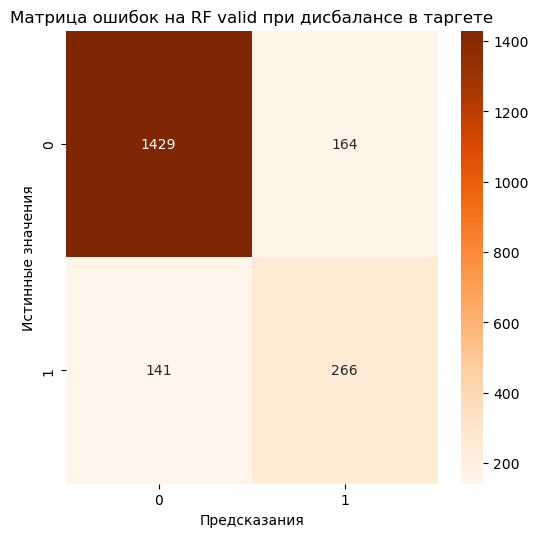

In [43]:
# построим матрицу ошибок
matrix = confusion_matrix(target_valid, 
pd.Series(model_rf.predict(features_valid_ohe_scaler)))

# построим тепловую карту (хитмэп) матрицы ошибок
plt.figure(figsize=(6, 6), dpi=100)
sns.heatmap(matrix, annot=True, fmt='g', cmap='Oranges')
plt.title('Матрица ошибок на RF valid \
при дисбалансе в таргете')
plt.xlabel('Предсказания')
plt.ylabel('Истинные значения')
plt.show()

По матрице ошибок нам необходимо определить:
- долю ложноположительных ответов, *FP / N* (маркетологи спрогнозировали уход клиентам, которые не планировали уходить);
- долю ложноотрицательных ответов, *FN / P* (маркетологи спрогнозировали, что клиенты останутся, при этом клиенты ушли).

Для расчёта значений воспользуемся формулами:

*FP / N = (FP / (FP + TN))*

*FN / P = (FN / (TP + FN))*

|        |        |
| ------ | ------ |
| **TN** | **FP** |
| **FN** | **TP** |

In [44]:
matrix = confusion_matrix(target_valid, 
pd.Series(model_rf.predict(features_valid_ohe_scaler)))

matrix

array([[1429,  164],
       [ 141,  266]], dtype=int64)

Доля ложноположительных ответов *FP / N* на валидационной выборке.

In [45]:
fp_n = (matrix[0][1] / (matrix[0][1] + matrix[0][0]))
print(f'{fp_n:.0%}')

10%


Доля ложноотрицательных ответов *FN / P* на валидационной выборке.

In [46]:
fn_p = (matrix[1][0] / (matrix[1][1] + matrix[1][0]))
print(f'{fn_p:.0%}')

35%


На валидационной выборке при дисбалансе в таргете доля ложноотрицательных ответов (35%) в 3,5 раза превышает долю ложноположительных (10%), а значит модель лучше прогнозирует объекты отрицательного класса (клиенты остались), что является следствием дисбаланса классов в таргете.

<a name="47"></a> <div style="text-align: right">[Cодержание](#1.-Содержание)</div>
### 4.7. Вывод

В разделе [**Исследование задачи**](#4.-Исследование-задачи) были выполнены следующие задачи:
1. При дисбалансе классов в таргете построены и обучены следующие модели:
    - модель дерева решений `DecisionTreeClassifier`;
    - модель случайного леса `RandomForestClassifier`;
    - модель случайного леса `RandomForestClassifier` с применением функции `GridSearchCV` для автоматического подбора гиперпараметров;
    - модель логистической регрессии `LogisticRegression`.
2. Выведена таблица сравнения метрик *F1*-мера и *AUC-ROC* разных моделей на валидационной выборке.
3. Рассчитана матрица ошибок.


В результате выполнения задач этого раздела было выявлено следующее:
- Из таблицы метрик видно, что при несбалансированном таргете только для одной модели случайного леса `RandomForestClassifier` без использования функции `GridSearchCV` метрика *F1*-мера > 0.59.
- Матрица ошибок показала, что на валидационной выборке при дисбалансе в таргете доля ложноотрицательных ответов (35%) в 3,5 раза превышает долю ложноположительных (10%), а значит модель лучше прогнозирует объекты отрицательного класса (клиенты остались), что является следствием дисбаланса классов в таргете.

<a name="5"></a> <div style="text-align: right">[Cодержание](#1.-Содержание)</div>
## 5. Борьба с дисбалансом

Улучшим качество модели, учитывая дисбаланс классов. Обучим разные модели и найдём лучшую.

Проделаем те же самые действия, что и в разделе [**Исследование задачи**](#4.-Исследование-задачи), но при этом улучшим качество моделей при помощи:
- добавления в модели параметра `class_weight='balanced'` - взвешивание классов;
- техники *upsampling* - увеличение обучающей выборки засчёт объектов положительного класса в таргете;
- техники *downsampling* - уменьшение обучающей выборки засчёт объектов отрицательного класса в таргете.

Сэмплировать допустимо только обучающую выборку. Поэтому мы не можем здесь использовать `GridSearchCV` для построения модели случайного леса, т.к. функция `GridSearchCV` использует промежуточную выборку (`train_valid`), которую она самостоятельно делит на обучающую и валидационную.

Напомним, что состав классов в таргете показывает, что количество ушедших клиентов (положительных ответов) почти в 4 раза меньше чем оставшихся в банке (отрицательных ответов).

In [47]:
target.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

По этой причине, увеличим количество объектов положительного класса в 2 раза, и, одновременно, уменьшим количество объектов отрицательного класса также в 2 раза.

<a name="51"></a> <div style="text-align: right">[Cодержание](#1.-Содержание)</div>
### 5.1. *Upsampling*

Улучшим качество моделей при помощи увеличения количества объектов положительного класса "1" в таргете обучающей выборки.

Выведем исходные размеры признаков и таргета.

In [48]:
print(features_train_ohe_scaler.shape)
print(target_train.shape)

(6000, 11)
(6000,)


Напишем функцию, которая улучшит качество моделей с помощью увеличения количества объектов положительного класса в 2 раза. Для этого разделим данные на объекты отрицательного "0" и положительного "1" классов.

In [49]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    # продублируем объекты положительного класса "1"
    # и объединим их с объектами отрицательного класса "0"
    repeat = 2
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    # добавим перемешивание данных
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=RANDOM_STATE)

    return features_upsampled, target_upsampled

Сэмплируем обучающую выборку `train`.

In [50]:
features_train_upsampled, target_train_upsampled = upsample(
    features_train_ohe_scaler, target_train, 2)

print(features_train_upsampled.shape)
print(target_train_upsampled.shape)

(7223, 11)
(7223,)


<a name="52"></a> <div style="text-align: right">[Cодержание](#1.-Содержание)</div>
### 5.2. *Downsampling*

Улучшим качество моделей при помощи уменьшения количества объектов отрицательного класса "0" в таргете сэмплированной выше обучающей выборки.

Напишем функцию, которая улучшит качество моделей с помощью уменьшения количества объектов отрицательного класса в 2 раза. Для этого разделим данные на объекты отрицательного "0" и положительного "1" классов.

In [51]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    # оставим долю объектов отрицательного класса "0"
    # и объединим их с объектами положительного класса "1"
    fraction = 0.5
    features_downsampled = pd.concat(
        [features_zeros.sample(
            frac=fraction, random_state=RANDOM_STATE)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(
            frac=fraction, random_state=RANDOM_STATE)] + [target_ones])
        
    # добавим перемешивание данных
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=RANDOM_STATE)
        
    return features_downsampled, target_downsampled

Сэмплируем обучающую выборку `train_upsampled`.

In [52]:
features_train_updownsampled, target_train_updownsampled = downsample(
    features_train_upsampled, target_train_upsampled, 0.5)

print(features_train_updownsampled.shape)
print(target_train_updownsampled.shape)

(4834, 11)
(4834,)


Выведем итоговые размеры признаков и таргета.

In [53]:
target_train_updownsampled.value_counts()

1    2446
0    2388
Name: Exited, dtype: int64

Итак, таргет обучающей выборки стал сбалансированным.

Исследуем *F1*-меры разных моделей, меняя гиперпараметры, с учётом устранения дисбаланса классов (используем выборку `updownsampled`).

Ко всем моделям применим взвешивание классов - добавление в модели параметра `class_weight='balanced'`.

<a name="53"></a> <div style="text-align: right">[Cодержание](#1.-Содержание)</div>
### 5.3. `DecisionTreeClassifier` при сбалансированном таргете

Классифицируем валидационные данные с помощью модели **дерева решений *Decision Tree*** при сбалансированном таргете.

Для построения графиков зависимости *F1*-меры от глубины дерева `max_depth` на обучающей и валидационной выборках дополнительно создадим следующие списки:
- `list_depth_dt_updownsampled` - список со значениями глубины дерева `max_depth`;
- `list_f1_dt_train_updownsampled` - список со значениями *F1*-меры на обучающей выборке;
- `list_f1_dt_valid_updownsampled` - список со значениями *F1*-меры на валидационной выборке.

In [54]:
%%time


# лучшая модель (модель с самым высоким значением F1-меры)
best_model_dt_updownsampled = None
# глубина дерева лучшей модели
best_depth_dt_updownsampled = 0
# F1-мера лучшей модели
best_f1_dt_updownsampled = 0
# AUC-ROC лучшей модели
best_roc_auc_dt_updownsampled = 0

# список с глубиной дерева max_depth 
list_depth_dt_updownsampled = []
# список с F1-мерой на обучающей выборке
list_f1_dt_train_updownsampled = []
# список с F1-мерой на валидационной выборке
list_f1_dt_valid_updownsampled = []

# напишем цикл для гиперпараметра max_depth от 1 до 10
for depth in tqdm(range(1, 10, 1)):
    # построим модель дерева решений model_dt_updownsampled, 
    # указав максимально допустимую глубину дерева max_depth 
    # и добавив взвешивание классов (параметр class_weight='balanced')
    model_dt_updownsampled = DecisionTreeClassifier(class_weight='balanced',
                                                    max_depth=depth,
                                                    random_state=RANDOM_STATE)
    # обучим модель на обучающей выборке
    model_dt_updownsampled.fit(
        features_train_updownsampled, target_train_updownsampled) 
        
    # получим предсказания модели на обучающей выборке
    predictions_dt_train_updownsampled = pd.Series(
        model_dt_updownsampled.predict(features_train_updownsampled))
    # рассчитаем F1-меру на обучающей выборке
    f1_dt_train_updownsampled = f1_score(
        target_train_updownsampled, predictions_dt_train_updownsampled)    
    
    # получим предсказания модели на валидационной выборке
    predictions_dt_valid_updownsampled = pd.Series(
        model_dt_updownsampled.predict(features_valid_ohe_scaler))
    # рассчитаем F1-меру на валидационной выборке
    f1_dt_valid_updownsampled = f1_score(
        target_valid, predictions_dt_valid_updownsampled)     
    
    # список с глубиной дерева max_depth
    list_depth_dt_updownsampled.append(depth) 
    # список с F1-мерой модели на обучающей выборке
    list_f1_dt_train_updownsampled.append(f1_dt_train_updownsampled)
    # список с F1-мерой модели на валидационной выборке
    list_f1_dt_valid_updownsampled.append(f1_dt_valid_updownsampled)
    
    # найдём значения вероятностей классов на валидационной выборке
    probabilities_dt_valid_updownsampled = model_dt_updownsampled.\
    predict_proba(features_valid_ohe_scaler)
    # в переменной probabilities_one_dt_valid_updownsampled 
    # сохраним значения вероятностей класса «1»
    probabilities_one_dt_valid_updownsampled = \
    probabilities_dt_valid_updownsampled[:, 1]
    # посчитаем AUC-ROC
    roc_auc_dt_valid_updownsampled = roc_auc_score(
        target_valid, probabilities_one_dt_valid_updownsampled)    
    
    # сохраним лучшие параметры
    if f1_dt_valid_updownsampled > best_f1_dt_updownsampled:
        # сохраним лучшую модель:
        best_model_dt_updownsampled = model_dt_updownsampled
        # сохраним глубину дерева лучшей модели 
        # на валидационной выборке
        best_depth_dt_updownsampled = depth 
        # сохраним F1-меру лучшей модели на валидационной выборке
        best_f1_dt_updownsampled = f1_dt_valid_updownsampled
        # сохраним AUC-ROC лучшей модели на валидационной выборке
        best_roc_auc_dt_updownsampled = roc_auc_dt_valid_updownsampled
        
        
print('Best model DT valid_updownsampled:', \
      best_model_dt_updownsampled)
print('Best max_depth DT valid_updownsampled:', \
      best_depth_dt_updownsampled)
print(f'Best F1-score DT valid_updownsampled: \
{best_f1_dt_updownsampled:.2f}')
print(f'Best AUC-ROC DT valid_updownsampled: \
{best_roc_auc_dt_updownsampled:.2f}')

100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 58.98it/s]

Best model DT valid_updownsampled: DecisionTreeClassifier(class_weight='balanced', max_depth=8, random_state=12345)
Best max_depth DT valid_updownsampled: 8
Best F1-score DT valid_updownsampled: 0.58
Best AUC-ROC DT valid_updownsampled: 0.79
CPU times: total: 156 ms
Wall time: 155 ms


Лучшая модель дерева решений **`DecisionTreeClassifier`** на валидационной выборке при сбалансированном таргете имеет значения метрик оценки качества:
- ***F1-мера = 0.58***
- ***AUC-ROC = 0.79*** 

при следующих параметрах:
- глубина дерева: `max_depth` = 8

Т.е. *F1*-мера не превышает заданный порог 0,59.

Выведем полученные списки `list_depth_dt_updownsampled`, `list_f1_dt_train_updownsampled` и `list_f1_dt_valid_updownsampled`.

In [55]:
# список с глубиной дерева max_depth
list_depth_dt_updownsampled

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [56]:
# список с F1-мерой модели на обучающей выборке
list_f1_dt_train_updownsampled

[0.6973478939157566,
 0.7189292543021033,
 0.6517448856799037,
 0.749611197511664,
 0.7731897067624178,
 0.7846655791190865,
 0.8028463792381749,
 0.8148464163822525,
 0.8444063437633947]

In [57]:
# список с F1-мерой модели на валидационной выборке
list_f1_dt_valid_updownsampled

[0.4804381846635367,
 0.4860681114551083,
 0.5159817351598174,
 0.5220883534136547,
 0.5556514236410699,
 0.5585585585585585,
 0.5711500974658869,
 0.5802469135802469,
 0.5542676501580611]

Построим график зависимости *F1*-меры модели дерева решений от глубины дерева `max_depth` на обучающей и валидационной выборках.

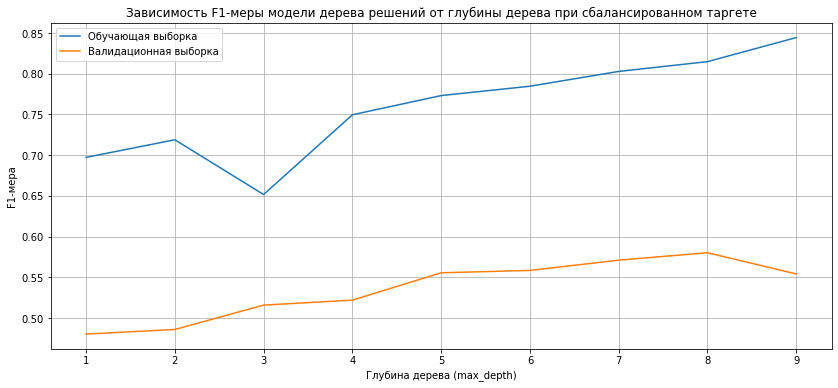

In [58]:
plt.figure(figsize=(14, 6))
plt.grid(True)
plt.plot(list_depth_dt_updownsampled, list_f1_dt_train_updownsampled)
plt.plot(list_depth_dt_updownsampled, list_f1_dt_valid_updownsampled)
plt.legend(['Обучающая выборка', 'Валидационная выборка'])
plt.xlabel('Глубина дерева (max_depth)')
plt.ylabel('F1-мера')
plt.title('Зависимость F1-меры модели дерева решений \
от глубины дерева при сбалансированном таргете')
plt.show()

На графике видно существенное расстояние между кривыми для обучающей и валидационной выборок. Видимо, это связано с тем, что в качестве обучающей использовалась сэмплированная обучающая выборкиа, а валидационная выборка при этом осталась без изменений.

<a name="54"></a> <div style="text-align: right">[Cодержание](#1.-Содержание)</div>
### 5.4. `RandomForestClassifier` при сбалансированном таргете

Классифицируем валидационные данные с помощью модели **случайного леса *Random Forest*** при сбалансированном таргете.

In [59]:
%%time


# лучшая модель (модель с самым высоким значением F1-меры)
best_model_rf_updownsampled = None
# количество деревьев лучшей модели
best_est_rf_updownsampled = 0
# глубина дерева лучшей модели
best_depth_rf_updownsampled = 0
# F1-мера лучшей модели
best_f1_rf_updownsampled = 0
# AUC-ROC лучшей модели
best_roc_auc_rf_updownsampled = 0

# напишем два цикла для гиперпараметров n_estimators и max_depth
for est in tqdm(range(17, 21, 1)):
    for depth in range (6, 10, 1):
        # построим модель случайного леса с заданным количеством деревьев 
        # n_estimators и глубиной дерева max_depth,
        # добавив взвешивание классов (параметр class_weight='balanced')
        model_rf_updownsampled = RandomForestClassifier(class_weight='balanced', 
                                                        max_depth=depth, 
                                                        n_estimators=est, 
                                                        random_state=RANDOM_STATE)
        # обучим модель на обучающей выборке
        model_rf_updownsampled.fit(
            features_train_updownsampled, target_train_updownsampled)
        
        # получим предсказания модели на валидационной выборке
        predictions_rf_valid_updownsampled = pd.Series(
            model_rf_updownsampled.predict(features_valid_ohe_scaler))
        # рассчитаем F1-меру на валидационной выборке
        f1_rf_valid_updownsampled = f1_score(
            target_valid, predictions_rf_valid_updownsampled)
        
        # найдём значения вероятностей классов на валидационной выборке
        probabilities_rf_valid_updownsampled = model_rf_updownsampled.\
        predict_proba(features_valid_ohe_scaler)
        # в переменной probabilities_one_rf_valid_updownsampled 
        # сохраним значения вероятностей класса «1»
        probabilities_one_rf_valid_updownsampled = \
        probabilities_rf_valid_updownsampled[:, 1]
        # посчитаем AUC-ROC
        roc_auc_rf_valid_updownsampled = roc_auc_score(
            target_valid, probabilities_one_rf_valid_updownsampled)       
        
        # сохраним лучшие параметры
        if f1_rf_valid_updownsampled > best_f1_rf_updownsampled:
            # сохраним лучшую модель
            best_model_rf_updownsampled = model_rf_updownsampled
            # сохраним количество деревьев лучшей модели
            # на валидационной выборке
            best_est_rf_updownsampled = est 
            # сохраним глубину дерева лучшей модели 
            # на валидационной выборке
            best_depth_rf_updownsampled = depth
            # сохраним F1-меру лучшей модели на валидационной выборке
            best_f1_rf_updownsampled = f1_rf_valid_updownsampled
            # сохраним AUC-ROC лучшей модели на валидационной выборке
            best_roc_auc_rf_updownsampled = roc_auc_rf_valid_updownsampled
          
            
print('Best model RF valid_updownsampled:', \
      best_model_rf_updownsampled)
print('Best max_depth RF valid_updownsampled:', \
      best_est_rf_updownsampled)
print('Best n_estimators RF valid_updownsampled:', \
      best_depth_rf_updownsampled)
print(f'Best F1-score RF valid_updownsampled: \
{best_f1_rf_updownsampled:.2f}')
print(f'Best AUC-ROC RF valid_updownsampled: \
{best_roc_auc_rf_updownsampled:.2f}')

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  2.97it/s]

Best model RF valid_updownsampled: RandomForestClassifier(class_weight='balanced', max_depth=8, n_estimators=19,
                       random_state=12345)
Best max_depth RF valid_updownsampled: 19
Best n_estimators RF valid_updownsampled: 8
Best F1-score RF valid_updownsampled: 0.62
Best AUC-ROC RF valid_updownsampled: 0.87
CPU times: total: 1.36 s
Wall time: 1.35 s


Лучшая модель случайного леса **`RandomForestClassifier`** на валидационной выборке при сбалансированном таргете имеет значения метрик оценки качества:
- ***F1-мера = 0.62***
- ***AUC-ROC = 0.87*** 

при следующих параметрах:
- глубина дерева: `max_depth` = 8
- количество деревьев: `n_estimators` = 19

Т.е. *F1*-мера превышает заданный порог 0,59.

<a name="55"></a> <div style="text-align: right">[Cодержание](#1.-Содержание)</div>
### 5.5. `LogisticRegression` при сбалансированном таргете

Классифицируем валидационные данные с помощью модели **логистической регрессии *Logistic Regression*** при сбалансированном таргете.

In [60]:
%%time


model_lr_updownsampled = LogisticRegression(class_weight='balanced', 
                                            random_state=RANDOM_STATE, 
                                            solver='lbfgs', 
                                            max_iter=1000) 
model_lr_updownsampled.fit(features_train_ohe_scaler, target_train) 

# получим предсказания модели на валидационной выборке
predictions_lr_valid_updownsampled = pd.Series(
    model_lr_updownsampled.predict(features_valid_ohe_scaler))
# рассчитаем F1-меру на валидационной выборке
f1_lr_valid_updownsampled = f1_score(
    target_valid, predictions_lr_valid_updownsampled)

# найдём значения вероятностей классов на валидационной выборке
probabilities_lr_valid_updownsampled = model_lr_updownsampled.\
predict_proba(features_valid_ohe_scaler)
# в переменной probabilities_one_lr_valid_updownsampled 
# сохраним значения вероятностей класса «1»
probabilities_one_lr_valid_updownsampled = \
probabilities_lr_valid_updownsampled[:, 1]
# посчитаем AUC-ROC
roc_auc_lr_valid_updownsampled = roc_auc_score(
    target_valid, probabilities_one_lr_valid_updownsampled)


print(f'Best F1-score LR valid_updownsampled: \
{f1_lr_valid_updownsampled:.2f}')
print(f'Best AUC-ROC LR valid_updownsampled: \
{roc_auc_lr_valid_updownsampled:.2f}')

Best F1-score LR valid_updownsampled: 0.51
Best AUC-ROC LR valid_updownsampled: 0.79
CPU times: total: 0 ns
Wall time: 13 ms


Модель логистической регрессии **`LogisticRegression`** на валидационной выборке при сбалансированном таргете имеет значения метрик оценки качества:
- ***F1-мера = 0.51***
- ***AUC-ROC = 0.79***

Т.е. *F1*-мера не превышает заданный порог 0,59, хотя после сэмплирования обучающей выборки её величина существенно увеличилась.
 
Итак, на валидационной выборке по метрике *F1*-мера лидирует модель случайного леса `RandomForestClassifier`.

<a name="56"></a> <div style="text-align: right">[Cодержание](#1.-Содержание)</div>
### 5.6. Сравнение моделей

Дополним таблицу `table` метриками *F1*-мера и *AUC-ROC*, полученными разными моделями на валидационной выборке при сбалансированном таргете.

In [61]:
table_add1 = pd.DataFrame([
    ['DecisionTreeClassifier', f'{best_f1_dt_updownsampled:.2f}',
     f'{best_roc_auc_dt_updownsampled:.2f}'],
    ['RandomForestClassifier', f'{best_f1_rf_updownsampled:.2f}',
     f'{best_roc_auc_rf_updownsampled:.2f}'],
    ['RandomForestClassifier + GridSearchCV', '-', '-'],
    ['LogisticRegression', f'{f1_lr_valid_updownsampled:.2f}',
     f'{roc_auc_lr_valid_updownsampled:.2f}']
],
columns=['model', 'F1-score valid_updownsampled', 'AUC-ROC valid_updownsampled'])


table = table.merge(table_add1, on='model', how='left')
print('F1-мера и AUC-ROC разных моделей \
при несбалансированном и сбалансированном таргете')
table

F1-мера и AUC-ROC разных моделей при несбалансированном и сбалансированном таргете


,model,F1-score valid,AUC-ROC valid,F1-score valid_updownsampled,AUC-ROC valid_updownsampled
0,DecisionTreeClassifier,0.58,0.81,0.58,0.79
1,RandomForestClassifier,0.64,0.86,0.62,0.87
2,RandomForestClassifier + GridSearchCV,0.56,0.85,-,-
3,LogisticRegression,0.32,0.79,0.51,0.79


Из таблицы видно, что при сбалансированном таргете только для одной модели случайного леса `RandomForestClassifier` метрика *F1*-мера > 0.59. При этом видно, что с ростом *F1*-меры растёт и площадь под *ROC*-кривой - метрика *AUC-ROC*.

<a name="57"></a> <div style="text-align: right">[Cодержание](#1.-Содержание)</div>
### 5.7. Матрица ошибок при сбалансированном таргете

Рассчитаем на валидационной выборке матрицу ошибок для модели случайного леса **`RandomForestClassifier`** при сбалансированном таргете.

In [62]:
# выведем баланс классов в таргете на валидационной выборке
target_valid.value_counts()

0    1593
1     407
Name: Exited, dtype: int64

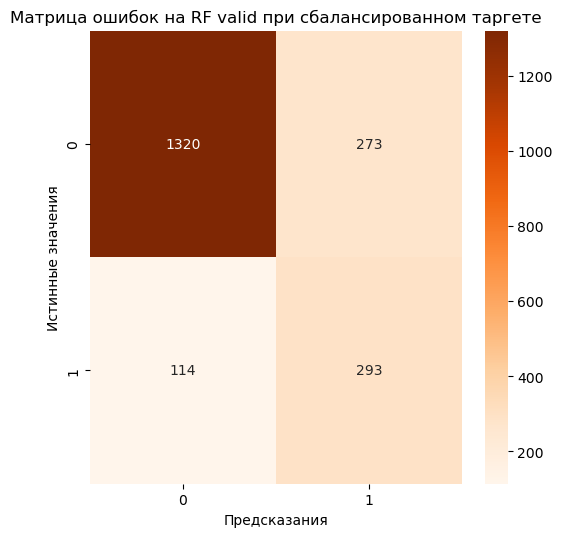

In [63]:
# построим матрицу ошибок
matrix = confusion_matrix(target_valid, 
pd.Series(model_rf_updownsampled.predict(features_valid_ohe_scaler)))

# построим тепловую карту (хитмэп) матрицы ошибок
plt.figure(figsize=(6, 6), dpi=100)
sns.heatmap(matrix, annot=True, fmt='g', cmap='Oranges')
plt.title('Матрица ошибок на RF valid \
при сбалансированном таргете')
plt.xlabel('Предсказания')
plt.ylabel('Истинные значения')
plt.show()

По матрице ошибок нам необходимо определить:
- долю ложноположительных ответов, *FP / N* (маркетологи спрогнозировали уход клиентам, которые не планировали уходить);
- долю ложноотрицательных ответов, *FN / P* (маркетологи спрогнозировали, что клиенты останутся, при этом клиенты ушли).

Для расчёта значений воспользуемся формулами:

*FP / N = (FP / (FP + TN))*

*FN / P = (FN / (TP + FN))*

|        |        |
| ------ | ------ |
| **TN** | **FP** |
| **FN** | **TP** |

In [64]:
matrix = confusion_matrix(target_valid, 
pd.Series(model_rf_updownsampled.predict(features_valid_ohe_scaler)))

matrix

array([[1320,  273],
       [ 114,  293]], dtype=int64)

Доля ложноположительных ответов *FP / N* на валидационной выборке.

In [65]:
fp_n = (matrix[0][1] / (matrix[0][1] + matrix[0][0]))
print(f'{fp_n:.0%}')

17%


Доля ложноотрицательных ответов *FN / P* на валидационной выборке.

In [66]:
fn_p = (matrix[1][0] / (matrix[1][1] + matrix[1][0]))
print(f'{fn_p:.0%}')

28%


На валидационной выборке при сбалансированном таргете доля ложноотрицательных ответов (28%) почти в 1,6 раза превышает долю ложноположительных (17%), а значит после сэмплирования обучающей выборки модель стала гораздо лучше прогнозировать объекты положительного класса (клиенты ушли).  Но, тем не менее, модель по-прежнему лучше прогнозирует объекты отрицательного класса (клиенты остались).

<a name="58"></a> <div style="text-align: right">[Cодержание](#1.-Содержание)</div>
### 5.8. Вывод

В разделе [**Борьба с дисбалансом**](#5.-Борьба-с-дисбалансом) были выполнены следующие задачи:
1. При сбалансированном таргете построены и обучены следующие модели:
    - модель дерева решений `DecisionTreeClassifier`;
    - модель случайного леса `RandomForestClassifier`;
    - модель логистической регрессии `LogisticRegression`.
2. Выведена таблица сравнения метрик *F1*-мера и *AUC-ROC* разных моделей на валидационной выборке.
3. Рассчитана матрица ошибок.


В результате выполнения задач этого раздела было выявлено следующее:
- Из таблицы видно, что при сбалансированном таргете только для одной модели случайного леса `RandomForestClassifier` метрика *F1*-мера > 0.59. При этом видно, что с ростом *F1*-меры растёт и площадь под *ROC*-кривой - метрика *AUC-ROC*.
- Матрица ошибок показала, что на валидационной выборке при сбалансированном таргете доля ложноотрицательных ответов (28%) почти в 1,6 раза превышает долю ложноположительных (17%), а значит после сэмплирования обучающей выборки модель стала гораздо лучше прогнозировать объекты положительного класса (клиенты ушли).  Но, тем не менее, модель по-прежнему лучше прогнозирует объекты отрицательного класса (клиенты остались).

<a name="6"></a> <div style="text-align: right">[Cодержание](#1.-Содержание)</div>
## 6. Тестирование лучшей модели

<a name="61"></a> <div style="text-align: right">[Cодержание](#1.-Содержание)</div>
### 6.1. Качество модели

При сбалансированном таргете на валидационной выборке по метрике *F1*-мера лидирует модель **случайного леса `RandomForestClassifier`**. Проверим качество этой модели на тестовой выборке.

In [67]:
# получим предсказания модели на тестовой выборке
predictions_rf_test_updownsampled = pd.Series(
    model_rf_updownsampled.predict(features_test_ohe_scaler))
# рассчитаем F1-меру на тестовой выборке
f1_rf_test_updownsampled = f1_score(
    target_test, predictions_rf_test_updownsampled)
        
# найдём значения вероятностей классов на тестовой выборке
probabilities_rf_test_updownsampled = model_rf_updownsampled.\
predict_proba(features_test_ohe_scaler)
# в переменной probabilities_one_rf_test_updownsampled
# сохраним значения вероятностей класса «1»
probabilities_one_rf_test_updownsampled = \
probabilities_rf_test_updownsampled[:, 1]
# посчитаем AUC-ROC
roc_auc_rf_test_updownsampled = roc_auc_score(
    target_test, probabilities_one_rf_test_updownsampled)   


print(f'Best F1-score RF test_updownsampled: \
{f1_rf_test_updownsampled:.2f}')
print(f'Best AUC-ROC RF test_updownsampled: \
{roc_auc_rf_test_updownsampled:.2f}')

Best F1-score RF test_updownsampled: 0.61
Best AUC-ROC RF test_updownsampled: 0.86


Лучшая модель случайного леса **`RandomForestClassifier`** на тестовой выборке имеет значения метрик оценки качества:
- ***F1-мера = 0.61***
- ***AUC-ROC = 0.86***

Т.е. *F1*-мера превышает заданный порог 0,59.

<a name="62"></a> <div style="text-align: right">[Cодержание](#1.-Содержание)</div>
### 6.2. Итоговое сравнение моделей

Дополним таблицу `table` метриками *F1*-мера и *AUC-ROC*, полученными моделью случайного леса **`RandomForestClassifier`** на тестовой выборке при сбалансированном таргете.

In [68]:
table_add2 = pd.DataFrame([
    ['DecisionTreeClassifier', '-', '-'],
    ['RandomForestClassifier', f'{f1_rf_test_updownsampled:.2f}',
     f'{roc_auc_rf_test_updownsampled:.2f}'],
    ['RandomForestClassifier + GridSearchCV', '-', '-'],
    ['LogisticRegression', '-', '-']
],
columns=['model', 'F1-score test_updownsampled', 'AUC-ROC test_updownsampled'])


table = table.merge(table_add2, on='model', how='left')
print('F1-мера и AUC-ROC разных моделей \
при несбалансированном и сбалансированном таргете')
table

F1-мера и AUC-ROC разных моделей при несбалансированном и сбалансированном таргете


,model,F1-score valid,AUC-ROC valid,F1-score valid_updownsampled,AUC-ROC valid_updownsampled,F1-score test_updownsampled,AUC-ROC test_updownsampled
0,DecisionTreeClassifier,0.58,0.81,0.58,0.79,-,-
1,RandomForestClassifier,0.64,0.86,0.62,0.87,0.61,0.86
2,RandomForestClassifier + GridSearchCV,0.56,0.85,-,-,-,-
3,LogisticRegression,0.32,0.79,0.51,0.79,-,-


Из таблицы видно, что при тестировании модели случайного леса `RandomForestClassifier` метрика *F1*-мера = 0.61. Т.е. при сбалансированном таргете и для тестовой, и для валидационной выборки *F1*-мера превышает заданный порог 0,59. При этом видно, что с ростом *F1*-меры растёт и площадь под *ROC*-кривой - метрика *AUC-ROC*.

<a name="63"></a> <div style="text-align: right">[Cодержание](#1.-Содержание)</div>
### 6.3. `DummyClassifier`

Проверим полученную модель случайного леса `RandomForestClassifier` на адекватность.

С помощью константной модели сделаем наивные прогнозы *F1*-меры и *AUC-ROC* на тестовой выборке при сбалансированном таргете. Для построения константной модели используем классификатор `DummyClassifier`.

In [69]:
# выведем относительные частоты классов 
# в таргете тестовой выборки (от 0 до 1)
target_test.value_counts(normalize=True)

0    0.7965
1    0.2035
Name: Exited, dtype: float64

In [70]:
# построим константную модель model_dummy
model_dummy = DummyClassifier(strategy='most_frequent', 
                              random_state=RANDOM_STATE)
# обучим модель model_dummy на обучающей выборке
model_dummy.fit(features_train_updownsampled, 
                target_train_updownsampled) 

# F1-мера:

# получим предсказания модели на тестовой выборке
predictions_dummy = pd.Series(
    model_dummy.predict(features_test_ohe_scaler))
# рассчитаем F1-меру для модели на тестовой выборке
f1_dummy = f1_score(target_test, predictions_dummy)

# AUC-ROC:

# найдём значения вероятностей классов на тестовой выборке
probabilities_dummy = model_dummy.predict_proba(features_test_ohe_scaler)
# в переменной probabilities_one_dummy сохраним значения 
# вероятностей положительного класса «1»
probabilities_one_dummy = probabilities_dummy[:, 1]
# посчитаем AUC-ROC
roc_auc_dummy = roc_auc_score(target_test, probabilities_one_dummy) 


print(f'Наивный прогноз F1-меры: {f1_dummy:.2f}')
print(f'Наивный прогноз AUC-ROC: {roc_auc_dummy:.2f}')

Наивный прогноз F1-меры: 0.34
Наивный прогноз AUC-ROC: 0.50


Наивные прогнозы *F1*-меры = 0.34 и *AUC-ROC* = 0.50, что существенно ниже значений этих метрик, полученных с помощью модели случайного леса `RandomForestClassifier` на тестовой выборке при сбалансированном таргете. Поэтому модель `RandomForestClassifier` можно считать адекватной.

<a name="64"></a> <div style="text-align: right">[Cодержание](#1.-Содержание)</div>
### 6.4. Матрица ошибок

Рассчитаем на тестовой выборке матрицу ошибок для модели случайного леса **`RandomForestClassifier`** при сбалансированном таргете.

In [71]:
# выведем баланс классов в таргете на тестовой выборке
target_test.value_counts()

0    1593
1     407
Name: Exited, dtype: int64

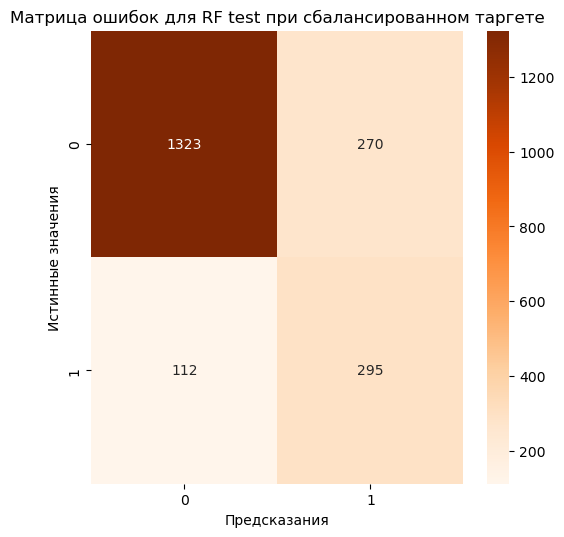

In [72]:
# построим матрицу ошибок
matrix = confusion_matrix(target_test, 
pd.Series(model_rf_updownsampled.predict(features_test_ohe_scaler)))

# построим тепловую карту (хитмэп) матрицы ошибок
plt.figure(figsize=(6, 6), dpi=100)
sns.heatmap(matrix, annot=True, fmt='g', cmap='Oranges')
plt.title('Матрица ошибок для RF test \
при сбалансированном таргете')
plt.xlabel('Предсказания')
plt.ylabel('Истинные значения')
plt.show()

По матрице ошибок нам необходимо определить:
- долю ложноположительных ответов, *FP / N* (маркетологи спрогнозировали уход клиентам, которые не планировали уходить);
- долю ложноотрицательных ответов, *FN / P* (маркетологи спрогнозировали, что клиенты останутся, при этом клиенты ушли).

Для расчёта значений воспользуемся формулами:

*FP / N = (FP / (FP + TN))*

*FN / P = (FN / (TP + FN))*

|        |        |
| ------ | ------ |
| **TN** | **FP** |
| **FN** | **TP** |

In [73]:
matrix = confusion_matrix(target_test, 
pd.Series(model_rf_updownsampled.predict(features_test_ohe_scaler)))

matrix

array([[1323,  270],
       [ 112,  295]], dtype=int64)

Доля ложноположительных ответов *FP / N* на тестовой выборке.

In [74]:
fp_n = (matrix[0][1] / (matrix[0][1] + matrix[0][0]))
print(f'{fp_n:.0%}')

17%


Доля ложноотрицательных ответов *FN / P* на тестовой выборке.

In [75]:
fn_p = (matrix[1][0] / (matrix[1][1] + matrix[1][0]))
print(f'{fn_p:.0%}')

28%


На тестовой выборке при сбалансированном таргете доля ложноотрицательных ответов (28%) почти в 1,6 раза превышает долю ложноположительных (17%), что немного выше, чем на валидационной выборке. Модель по-прежнему лучше прогнозирует объекты отрицательного класса (клиенты остались).

<a name="65"></a> <div style="text-align: right">[Cодержание](#1.-Содержание)</div>
### 6.5. *ROC*-кривая

Построим *ROC*-кривую для модели случайного леса **`RandomForestClassifier`** на тестовой выборке при сбалансированном таргете.

Для построения *ROC*-кривой необходимо на графике отобразить по горизонтали характеристику *FPR*, а по вертикали - *TPR*. 

При этом:
- *TPR = TP / P*, где *P = TP + FN*,
- *FPR = FP / N*, где *N = FP + TN*,

где
- *True Positive Rate, TPR* - доля верно предсказанных объектов к общему числу объектов класса (*recall*, "полнота"), 
- *False Positive Rate, FPR* - доля ложных срабатываний к общему числу объектов за пределами класса.

Переберём значения порога `thresholds` случайного леса `RandomForestClassifier` и проведём кривую. Она называется *ROC*-кривая, или кривая ошибок (от англ. *receiver operating characteristic*, «характеристика работы приёмника»; термин пришёл из теории обработки сигналов).

Для модели, которая всегда отвечает случайно, *ROC*-кривая выглядит как прямая, идущая из левого нижнего угла в верхний правый. Чем график выше, тем больше значение *TPR* и лучше качество модели.

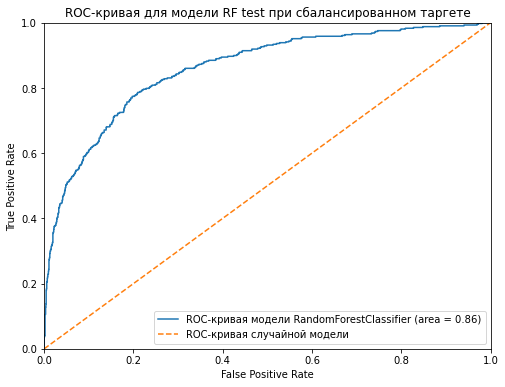

In [76]:
# построим ROC-кривую для модели случайного леса RandomForestClassifier 
# на тестовой выборке при сбалансированном таргете
fpr_rf_test_updownsampled, tpr_rf_test_updownsampled, thresholds = \
roc_curve(target_test, probabilities_one_rf_test_updownsampled)

plt.figure(figsize=(8,6))

# построим график
plt.plot(fpr_rf_test_updownsampled, tpr_rf_test_updownsampled)

# ROC-кривая случайной модели (выглядит как прямая)
plt.plot([0, 1], [0, 1], linestyle='--')

# применим функции plt.xlim() и plt.ylim(), 
# чтобы установить границы осей от 0 до 1
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# подпишем кривые
plt.legend(['ROC-кривая модели RandomForestClassifier (area = %0.2f)' % \
            roc_auc_rf_test_updownsampled, 'ROC-кривая случайной модели'])

# применим функции plt.xlabel() и plt.ylabel(), чтобы подписать оси
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# добавим к графику заголовок "ROC-кривая" функцией plt.title()
plt.title('ROC-кривая для модели RF test при сбалансированном таргете')

plt.show()

На графике видно, что площадь под *ROC*-кривой модели случайного леса `RandomForestClassifier` *AUC-ROC* = 0.86, что значительно превышает площадь под *ROC*-кривой случайной модели *AUC-ROC* = 0.5.

<a name="66"></a> <div style="text-align: right">[Cодержание](#1.-Содержание)</div>
### 6.6. Вывод

В разделе [**Тестирование лучшей модели**](#6.-Тестирование-лучшей-модели) были выполнены следующие задачи:
1. качесто выбранной модели проверено на тестовой выборке;
2. полученная модель проверена на адекватность;
3. рассчитана матрица ошибок;
4. построена *ROC*-кривая.


В результате выполнения задач этого раздела было выявлено следующее:
- Лучшая модель случайного леса **`RandomForestClassifier`** на тестовой выборке имеет значения метрик ***F1-мера = 0.61*** и ***AUC-ROC = 0.86***.
- Наивные прогнозы *F1*-меры = 0.34 и *AUC-ROC* = 0.50, что существенно ниже значений этих метрик, полученных с помощью модели случайного леса `RandomForestClassifier` на тестовой выборке при сбалансированном таргете. Поэтому модель `RandomForestClassifier` можно считать адекватной.
- На тестовой выборке при сбалансированном таргете доля ложноотрицательных ответов (28%) почти в 1,6 раза превышает долю ложноположительных (17%), что немного выше, чем на валидационной выборке. Модель по-прежнему лучше прогнозирует объекты отрицательного класса (клиенты остались).
- Площадь под *ROC*-кривой модели случайного леса `RandomForestClassifier` *AUC-ROC* = 0.86, что значительно превышает площадь под *ROC*-кривой случайной модели *AUC-ROC* = 0.5.

<a name="7"></a> <div style="text-align: right">[Cодержание](#1.-Содержание)</div>
## 7. Общий вывод

Проведено исследование с целью построения модели машинного обучения, которая поможет прогнозировать уход клиентов из «Бета-Банка» в ближайшее время.

Результаты исследования позволят маркетологам сохранить текущих клиентов, т.к. это дешевле, чем привлекать новых.

Входные данные: исторические данные о поведении клиентов и расторжении договоров с банком. Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling).

Перед проведением исследования были сформулированы несколько гипотез:

- Гипотеза 1: лучшая модель на валидационной выборке - модель случайного леса;
- Гипотеза 2: значение метрики *F1*-мера лучшей модели больше 0.59;
- Гипотеза 3: значение метрики *AUC-ROC* повышается с ростом значения *F1*-меры;
- Гипотеза 4: лучшая модель чаще ошибается, прогнозируя клиентов, которые ушли из банка.

В ходе исследования удалось получить следующие результаты **на валидационной выборке** при сбалансированном таргете:

1. Лучшая модель дерева решений **`DecisionTreeClassifier`** имеет значения метрик оценки качества:
    - ***F1-мера = 0.58***
    - ***AUC-ROC = 0.79*** 

   при следующих параметрах:
    - глубина дерева: `max_depth` = 8


2. Лучшая модель случайного леса **`RandomForestClassifier`** имеет значения метрик оценки качества:
    - ***F1-мера = 0.62***
    - ***AUC-ROC = 0.87*** 

   при следующих параметрах:
    - глубина дерева: `max_depth` = 8
    - количество деревьев: `n_estimators` = 19


3. Модель логистической регрессии **`LogisticRegression`** имеет значения метрик оценки качества:
    - ***F1-мера = 0.51***
    - ***AUC-ROC = 0.79***


Исходя из полученных результатов, можно сделать следующие **выводы**:

Лучшая модель случайного леса **`RandomForestClassifier` на тестовой выборке** имеет значения метрик оценки качества:
- ***F1-мера = 0.61***
- ***AUC-ROC = 0.86***

Т.е. значение метрики ***F1-мера*** на тестовой выборке превышает ***0.59***, что соответствует изначальному требованию в условии задачи проекта.

В результате удалось выявить следующие зависимости.

<b>Гипотеза 1 подтвердилась:</b>

На валидационной выборке при сбалансированном таргете:
- ***F1-мера = 0.58*** для модели дерева решений **`DecisionTreeClassifier`**;
- ***F1-мера = 0.62*** для модели случайного леса **`RandomForestClassifier`**;
- ***F1-мера = 0.51*** для модели логистической регрессии **`LogisticRegression`**.

Рекомендация: для улучшения работы модели случайного леса можно собрать и добавить в исследуемый датасет дополнительные данные об ушедших клиентах (т.е. добавить в датасет данные с объектами положительного класса в таргете).

<b>Гипотеза 2 подтвердилась:</b>

На валидационной выборке при сбалансированном таргете:
- ***F1-мера = 0.62*** для модели случайного леса **`RandomForestClassifier`**.

Рекомендация: для увеличения метрики *F1*-мера можно собрать более полные данные о том, сколько лет человек является клиентом банка (`Tenure`), либо провести более тщательную предобработку этих данных.

<b>Гипотеза 3 подтвердилась:</b>

На валидационной выборке при сбалансированном таргете:
- ***AUC-ROC = 0.79*** для модели дерева решений **`DecisionTreeClassifier`**;
- ***AUC-ROC = 0.87*** для модели случайного леса **`RandomForestClassifier`**;
- ***AUC-ROC = 0.79*** для модели логистической регрессии **`LogisticRegression`**.

Рекомендация: для метрики *AUC-ROC* аналогична рекомендации для гипотезы 2.

<b>Гипотеза 4 подтвердилась:</b>

На тестовой выборке при сбалансированном таргете доля ложноотрицательных ответов (28%) почти в 1,6 раза превышает долю ложноположительных (17%), что немного выше, чем на валидационной выборке. Модель по-прежнему лучше прогнозирует объекты отрицательного класса (клиенты остались).

Рекомендация: для улучшения предсказания модели аналогична рекомендации для гипотезы 1.


<b>Общие рекомендации:</b>

Маркетологам, которые занимаются исследованием поведения пользователей и планированием увеличения прибыли, можно использовать зависимости из всех гипотез 1, 2, 3 и 4.